In [27]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import pickle

In [5]:
X,y = datasets.load_iris(return_X_y=True,as_frame=True)

X

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [7]:
data = X.copy()
data["target"] = y.values
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [31]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

<Figure size 1080x1080 with 0 Axes>

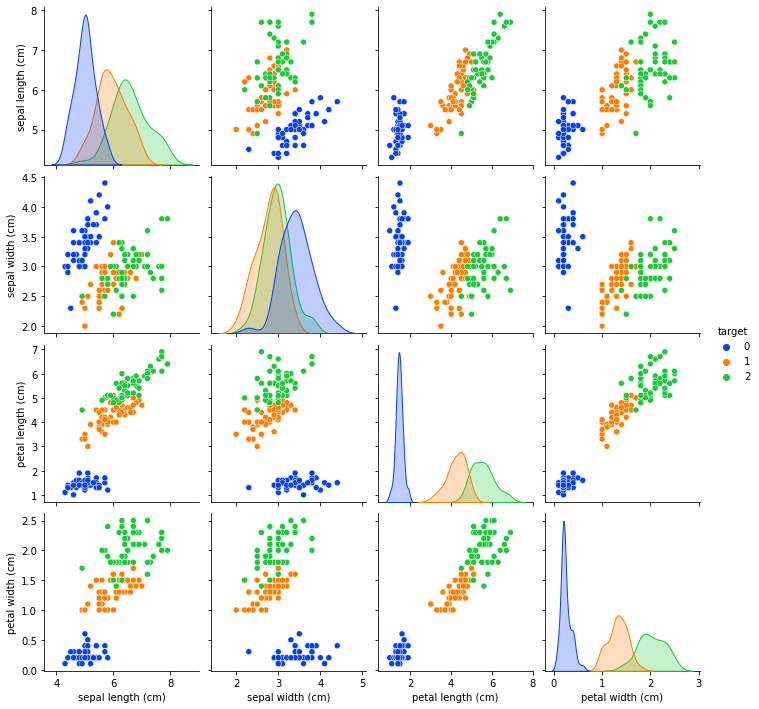

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,15))
sns.pairplot(data,hue="target",palette='bright')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,stratify=y)
sc = StandardScaler()
Xtrain_norm = sc.fit_transform(Xtrain,ytrain)
Xtest_norm = sc.transform(Xtest)

In [25]:
model = RandomForestClassifier(n_estimators=200,random_state=0)
model.fit(Xtrain_norm,ytrain)

RandomForestClassifier(n_estimators=200, random_state=0)

In [26]:
score = model.score(Xtest_norm,ytest)
print(f"Score : {score*100} %")

Score : 90.0 %


In [32]:
with open("../model.pkl","wb") as f:
    pickle.dump((model,sc),f)


In [33]:
with open("../model.pkl","rb") as f:
    res = pickle.load(f)

res

(RandomForestClassifier(n_estimators=200, random_state=0), StandardScaler())

In [37]:
model.predict(Xtest_norm)

array([1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 1, 0,
       2, 1, 1, 2, 2, 1, 2, 0])